In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [19]:
policias = pd.read_csv('data/PoliceKillingsUS.csv', encoding='ISO-8859-1')

policias

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun  53.0   
1        4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4        9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun  31.0   
2531  2813               TK TK  28/07/17              shot     vehicle   NaN   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun  48.0   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle  28.0   
2534  2815        Dwayne Jeune  31/07/17              shot       knife  32.0   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M  NaN    Kansas City    MO                    False       attack   
2531      M  NaN    Albuquerque    NM                    False       attack   
2532      M  NaN          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

In [3]:
policias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [20]:
# Verificar valores nulos
print(policias.isnull().sum())


id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [21]:
# Eliminar filas con valores nulos
policias_cleaned = policias.dropna()


In [22]:
# Verificar valores nulos
print(policias_cleaned.isnull().sum())

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee']

for column in categorical_columns:
    policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])


/tmp/ipykernel_5271/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_5271/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_5271/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [26]:
policias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   int64  
 4   armed                    2254 non-null   int64  
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   int64  
 7   race                     2254 non-null   int64  
 8   city                     2254 non-null   int64  
 9   state                    2254 non-null   int64  
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   int64  
 12  flee                     2254 non-null   int64  
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), int64

In [27]:
policias_cleaned

id                name      date  manner_of_death  armed   age  \
0        3          Tim Elliot  02/01/15                0     25  53.0   
1        4    Lewis Lee Lembke  02/01/15                0     25  47.0   
2        5  John Paul Quintero  03/01/15                1     63  23.0   
3        8     Matthew Hoffman  04/01/15                0     62  32.0   
4        9   Michael Rodriguez  04/01/15                0     44  39.0   
...    ...                 ...       ...              ...    ...   ...   
2519  2805         Aries Clark  25/07/17                0     64  16.0   
2523  2808   Kesharn K. Burney  26/07/17                0     66  25.0   
2525  2820    Deltra Henderson  27/07/17                0     25  39.0   
2533  2817       Isaiah Tucker  31/07/17                0     66  28.0   
2534  2815        Dwayne Jeune  31/07/17                0     32  32.0   

      gender  race  city  state  signs_of_mental_illness  threat_level  flee  \
0          1     0  1047     47                     True             0     2   
1          1     5    20     37                    False             0     2   
2          1     2  1247     16                    False             1     2   
3          1     5  1008      4                     True             0     2   
4          1     2   361      5                    False             0     2   
...      ...   ...   ...    ...                      ...           ...   ...   
2519       1     1   693      2                    False             2     2   
2523       1     1   276     35                    False             0     0   
2525       1     1   509     18                    False             0     0   
2533       1     1   847     48                    False             0     0   
2534       1     1   142     34                     True             0     2   

      body_camera  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
2519        False  
2523        False  
2525        False  
2533         True  
2534        False  

[2254 rows x 14 columns]

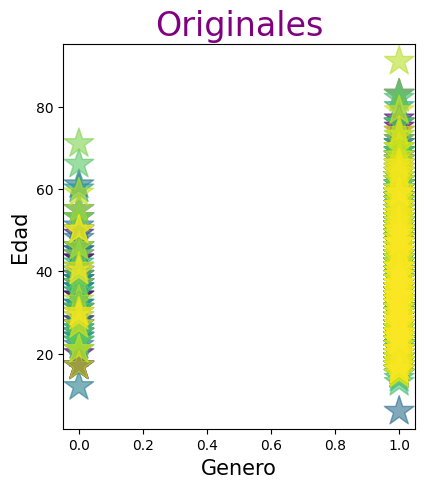

In [63]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(policias_cleaned['gender'], policias_cleaned["age"], marker="*",
           s=500, c=range(policias_cleaned['gender'].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Edad", size=15)
ax.set_xlabel("Genero", size=15)
ax.ticklabel_format(style="plain")

In [37]:
escala_gender = preprocessing.MinMaxScaler()
escala_age = preprocessing.MinMaxScaler()
gender = escala_gender.fit_transform(policias_cleaned["gender"].values.reshape(-1, 1))
age = escala_age.fit_transform(policias_cleaned["age"].values.reshape(-1, 1))

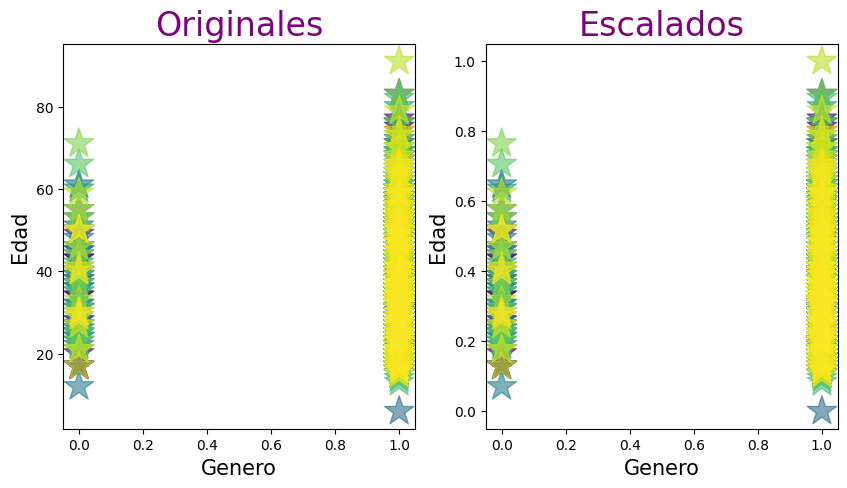

In [40]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(policias_cleaned["gender"], policias_cleaned["age"], marker="*",
           s=500, c=range(policias_cleaned["gender"].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Edad", size=15)
ax.set_xlabel("Genero", size=15)
ax.ticklabel_format(style="plain")
# Graficar datos escalados: gender vs age
ax = fig.add_subplot(1, 2, 2)

ax.scatter(gender, age, marker="*", 
           s=500, c=range(gender.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Edad", size=15)
ax.set_xlabel("Genero", size=15)
ax.ticklabel_format(style="plain")

plt.show()

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(gender, age)

gender_instancia = escala_gender.transform([[20000]])
age_instancia = knn.predict(gender_instancia)
escala_age.inverse_transform(age_instancia)

array([[43.66666667]])

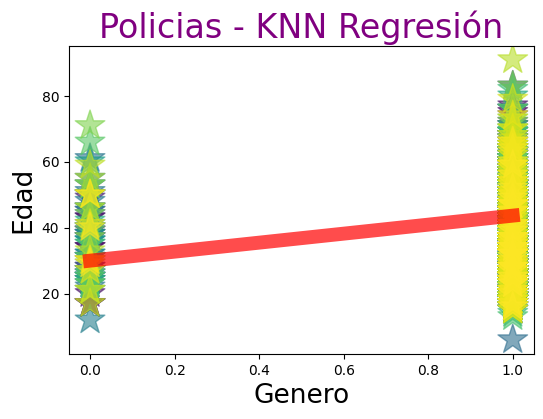

In [47]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(gender, age)


# Múltiples regresiones de los valores dentro del rango
gender_instancias = escala_gender.transform(np.arange(2).reshape(-1, 1))
age_instancias = knn.predict(gender_instancias)
todas = escala_age.inverse_transform(age_instancias)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(2), todas.reshape(1, -1)[0], 
        linewidth=10, color="red", alpha=0.7)

plt.scatter(policias_cleaned["gender"], policias_cleaned["age"], marker="*",
            s=500, c=range(policias_cleaned["gender"].size), alpha=0.6)

plt.title("Policias - KNN Regresión", size=24, color="purple")
plt.ylabel("Edad", size=19)
plt.xlabel("Genero", size=19)
plt.ticklabel_format(style="plain")
plt.show()

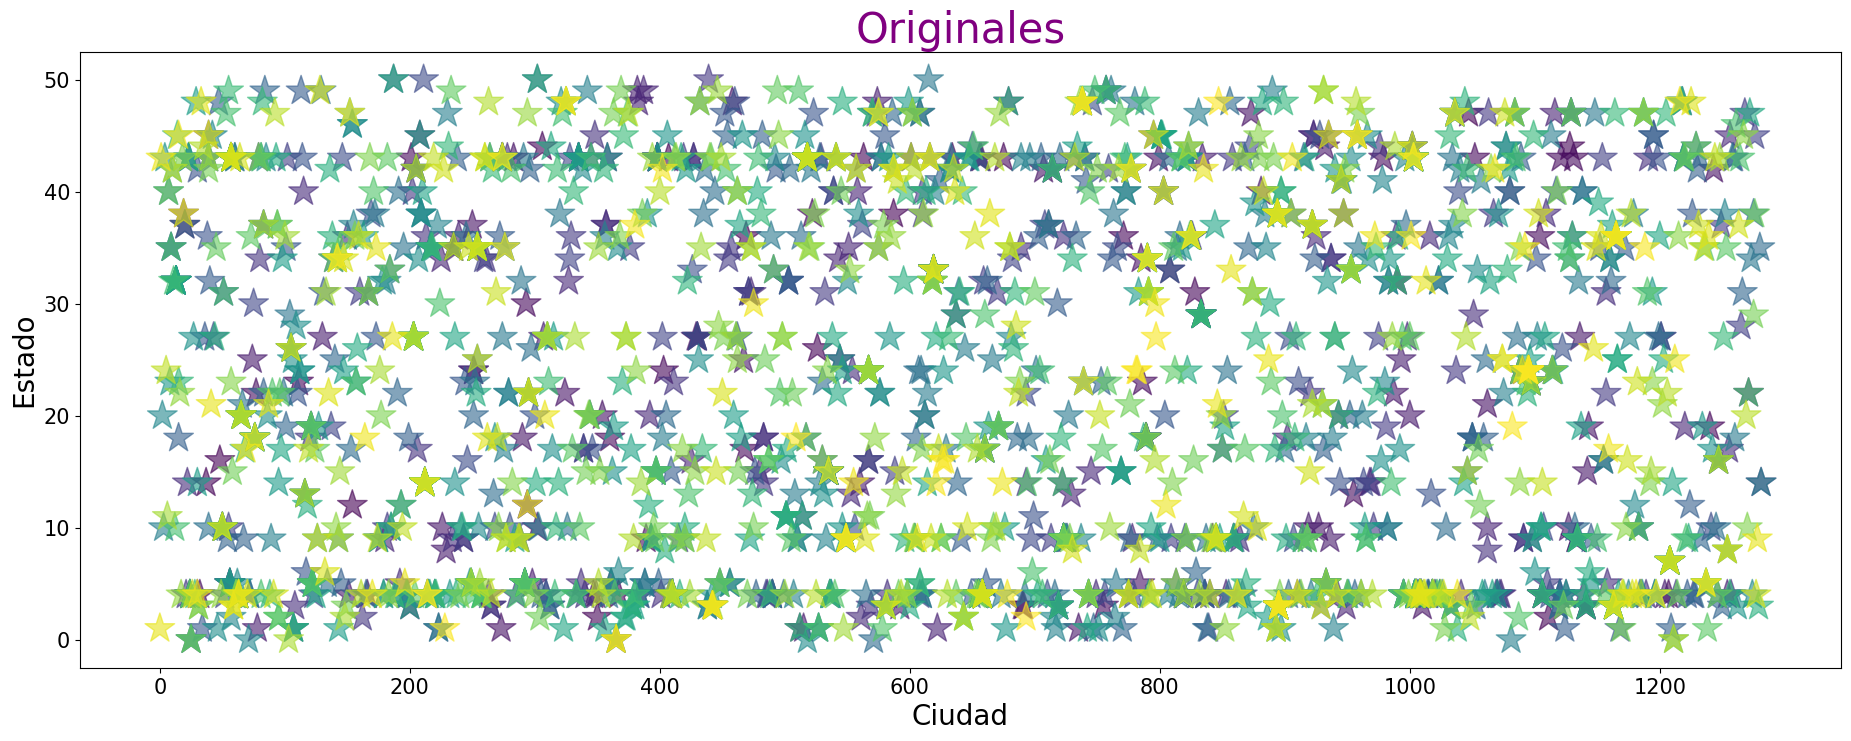

In [76]:
fig = plt.figure(figsize=(50, 8))  # Tamaño de la figura mucho más ancho

ax = fig.add_subplot(1, 2, 1)

ax.scatter(policias_cleaned['city'], policias_cleaned["state"], marker="*",
           s=500, c=range(policias_cleaned['city'].size), alpha=0.6)

ax.set_title("Originales", size=30, color="purple")  # Tamaño del título aumentado
ax.set_ylabel("Estado", size=20)  # Etiqueta del eje Y corregida y tamaño aumentado
ax.set_xlabel("Ciudad", size=20)  # Etiqueta del eje X corregida y tamaño aumentado
ax.tick_params(axis='both', which='major', labelsize=15)  # Tamaño de las etiquetas de los ejes

plt.show()

In [78]:
# Escalar los datos
escala_city = preprocessing.MinMaxScaler()
escala_state = preprocessing.MinMaxScaler()

# Suponiendo que 'city' y 'state' son numéricos o convertibles a numéricos
city = escala_city.fit_transform(policias_cleaned["city"].values.reshape(-1, 1))
state = escala_state.fit_transform(policias_cleaned["state"].values.reshape(-1, 1))


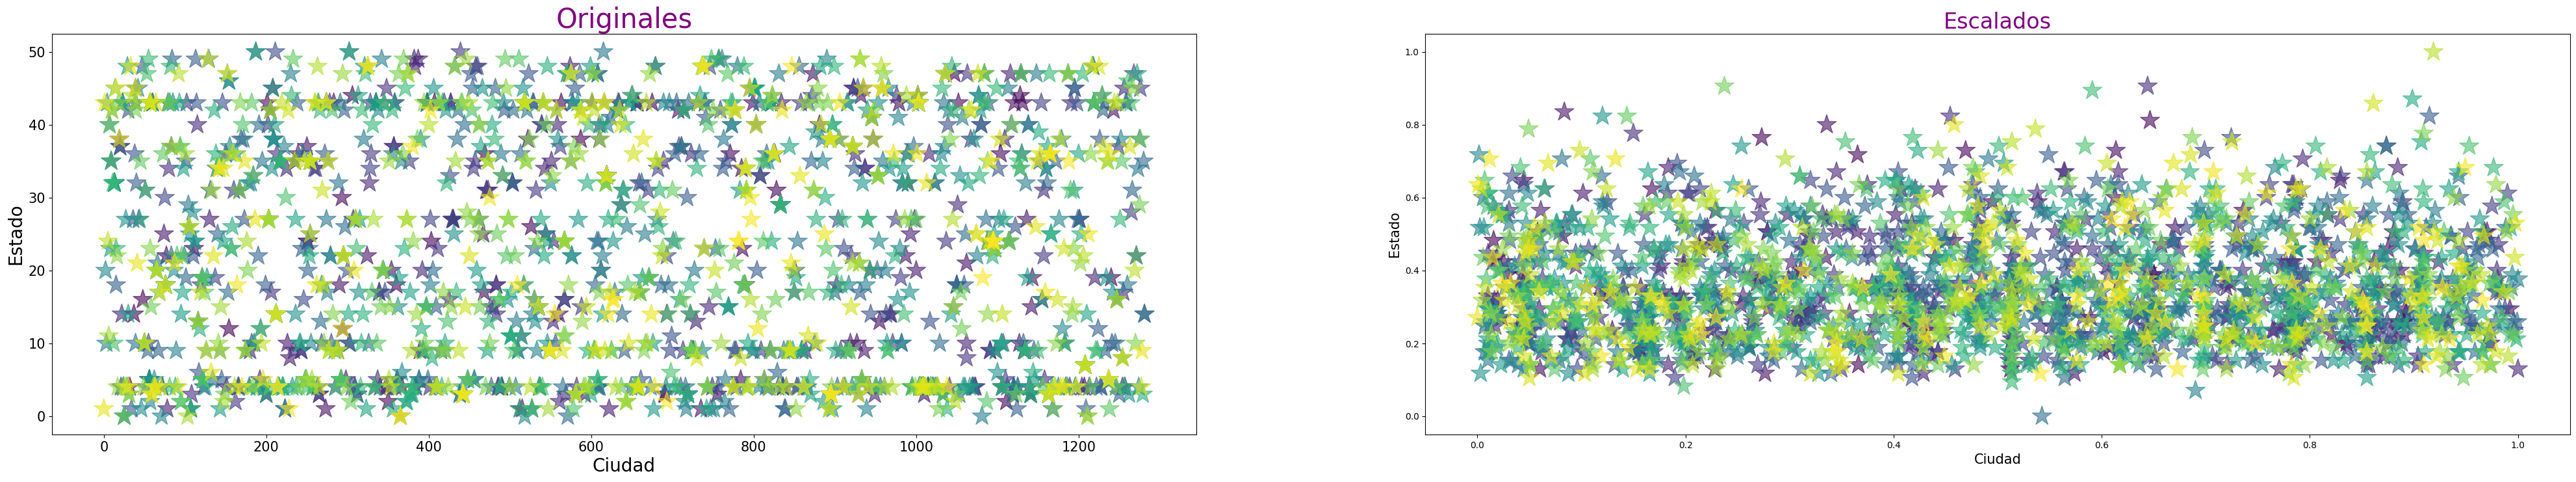

In [79]:
fig = plt.figure(figsize=(50, 8))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(policias_cleaned['city'], policias_cleaned["state"], marker="*",
           s=500, c=range(policias_cleaned['city'].size), alpha=0.6)

ax.set_title("Originales", size=30, color="purple")  # Tamaño del título aumentado
ax.set_ylabel("Estado", size=20)  # Etiqueta del eje Y corregida y tamaño aumentado
ax.set_xlabel("Ciudad", size=20)  # Etiqueta del eje X corregida y tamaño aumentado
ax.tick_params(axis='both', which='major', labelsize=15)  # Tamaño de las etiquetas de los ejes
# Graficar datos escalados: gender vs age
ax = fig.add_subplot(1, 2, 2)

ax.scatter(city, age, marker="*", 
           s=500, c=range(city.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Estado", size=15)
ax.set_xlabel("Ciudad", size=15)
ax.ticklabel_format(style="plain")

plt.show()

In [84]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(city, state)

city_instancia = escala_city.transform([[20000]])
state_instancia = knn.predict(city_instancia)
escala_city.inverse_transform(state_instancia)

array([[538.02]])

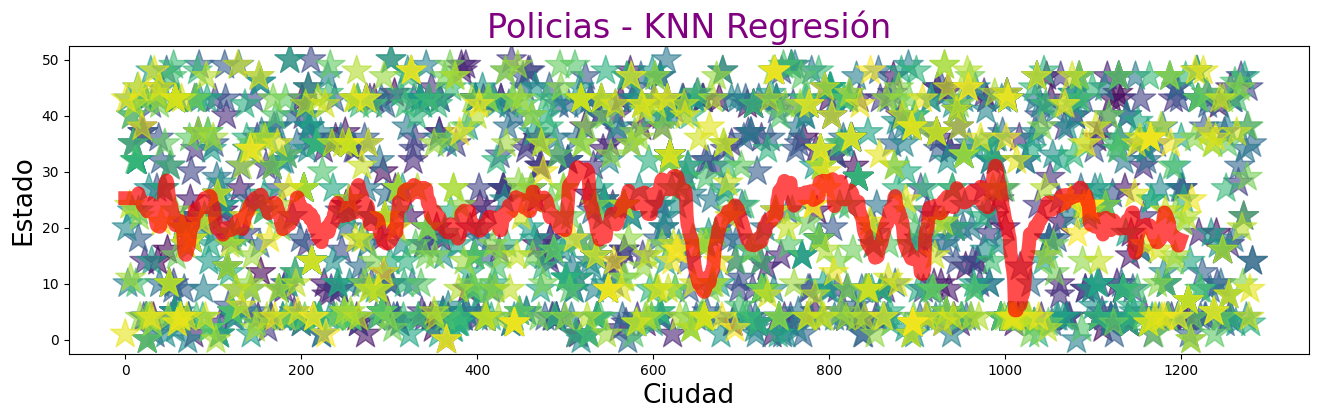

In [88]:
knn = KNeighborsRegressor(n_neighbors=55)
knn.fit(city, state)


# Múltiples regresiones de los valores dentro del rango
city_instancias = escala_city.transform(np.arange(1200).reshape(-1, 1))
state_instancias = knn.predict(city_instancias)
todas = escala_state.inverse_transform(state_instancias)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(16, 4))

plt.plot(np.arange(1200), todas.reshape(1, -1)[0], 
        linewidth=10, color="red", alpha=0.7)

plt.scatter(policias_cleaned["city"], policias_cleaned["state"], marker="*",
            s=500, c=range(policias_cleaned["city"].size), alpha=0.6)

plt.title("Policias - KNN Regresión", size=24, color="purple")
plt.ylabel("Estado", size=19)
plt.xlabel("Ciudad", size=19)
plt.ticklabel_format(style="plain")
plt.show()